# Men Soccer Players with the most official appearances

This is a list of footballers who have played at least 1,000 official football matches at all age levels: regarding junior levels, only the matches with national teams are counted, because such data for club levels cannot be found for the majority of the players.

Goalkeeper Peter Shilton holds the record for the most appearances. However, Robert Carmona, who in March 2022 was reported to have been recognized as the currently oldest active footballer by Guinness World Records,[1][2][3] has been reported as having played around 2,200 official matches,[1][2][3] a number that would make him top the list by far, but, in lack of details about the number of matches per team and as it's unclear even which are the teams he played,[4][5][6] he cannot be added to the list, at least for the time being.

The current active player with the most official appearances is goalkeeper Fábio, who is 4th overall, as well as among goalkeepers, while Cristiano Ronaldo is the active outfield player with the most official appearances, eighth overall, and second among outfield players.

Goalkeepers' career on average spans longer and so they play more matches on average, as they face fewer physical challenges than outfield players.[7][8]

Tommy Hutchison, who played professionally until the age of 46, holds the record among outfield players, and he is sixth overall. 

https://en.wikipedia.org/wiki/List_of_men%27s_footballers_with_the_most_official_appearances


In [3]:
#conda list matplotlib

##### Troubleshooting errors

In [326]:

#!python -m pip uninstall matplotlib
#!python -m pip install -U matplotlib
#!pip uninstall matplotlib 
#!pip install matplotlib --force-reinstall --user
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install numpy
#!pip install pandas
#!pip install --upgrade networkx 
#!pip install community

!#pip uninstall community
#!pip install python-louvain

#pip uninstall networkx
#!pip uninstall python-louvain
#!pip uninstall community
#!pip install python-louvain
#!pip install networkx

#!pip install cdlib


^C


##### Library

In [10]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
import pandas as pd
import numpy as np
import csv
import networkx as nx
import matplotlib.pyplot as plt
#from matplotlib import animation, cbook

from collections import Counter
import networkx.algorithms.bipartite as bipartite
#108 from matplotlib.cbook import MatplotlibDeprecationWarning, sanitize_sequence
#109 from matplotlib.cbook import mplDeprecation  # deprecated

#surpress warning
#import warnings
#import matplotlib.cbook
#warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)



##### Load dataset

In [168]:
# Import the data from github
url = 'https://raw.githubusercontent.com/asmozo24/Data620_Project2/main/men_footballers_most_official_appearances2.csv'
#,sep = "\t", encoding='latin'
top_Appear = pd.read_csv(url, encoding='latin') # encoding = 'utf-16')
print(top_Appear.head(8))
df = top_Appear[['Players', 'Teams']]
df


         Players              Teams
0  Peter Shilton     Leicester City
1  Peter Shilton         Stoke City
2  Peter Shilton  Nottingham Forest
3  Peter Shilton        Southampton
4  Peter Shilton       Derby County
5  Peter Shilton    Plymouth Argyle
6  Peter Shilton   Bolton Wanderers
7  Peter Shilton      Leyton Orient


,Players,Teams
0,Peter Shilton,Leicester City
1,Peter Shilton,Stoke City
2,Peter Shilton,Nottingham Forest
3,Peter Shilton,Southampton
4,Peter Shilton,Derby County
...,...,...
260,Ronnie Rooke,Arsenal
261,Ronnie Rooke,Bedford Town
262,Ronnie Rooke,Haywards Heath Town
263,Ronnie Rooke,Addlestone


In [169]:
#frequency indicating how often each of the categories are observed together (crosstab)
df = pd.crosstab([df["Players"]], df["Teams"])
df

Teams,AEK Athens,Addlestone,Ajax,Al Sadd,Al-Gharafa,Alaves,Alloa Athletic,Anzhi Makhachkala,Ards,Arsenal,...,Weston-super-Mare,Wisbech Town,Woking,Wolverhampton Wanderers,Worksop Town,XV de Jau,Yokohama FC,Yokohama Flgels,Ypiranga,ruda hvezda VII
Players,,,,,,,,,,,,,,,,,,,,,
Alan Ball,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Andoni Zubizarreta,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andres Iniesta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Clarence Seedorf,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cristiano Ronaldo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dani Alves,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
David James,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
David Seaman,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Fabio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Create a network...Let's extract the two node


In [196]:
#df.shape
#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#    display(df)
#df.to_csv('top_appear.csv', index = True) #C:\\Users\\owner\\Downloads\\top100Footballers.csv
df1 = pd.read_csv('C:\\Users\\owner\\Downloads\\top_appear.csv',encoding='latin' )
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df1)


,Players,AEK Athens,Addlestone,Ajax,Al Sadd,Al-Gharafa,Alaves,Alloa Athletic,Anzhi Makhachkala,Ards,Arsenal,Ashton United,Aston Villa,Athletic Bilbao,Atletico Paranaense,Aylesbury United,Bahia,Banfield,Barcelona,Barrow,Barry Town,Bath City,Bayer Leverkusen,Bayern Munich,Bedford Town,Bilbao Athletic,Birmingham City,Blackburn Rovers,Blackpool,Boa,Bolton Wanderers,Boston United,Botafogo,Bournemouth,Bradford City,Bristol City,Bristol Rovers,Bulova,Bunyodkor,Burnley,Cambridge United,Campinense,Canberra City,Cardiff City,Chelsea,Cheltenham Town,Club Brugge,Clube de Regatas Brasil,Corby Town,Corinthians Paulista,Coritiba,Cork United,Coventry City,Crewe Alexandra,Croatia Zagreb,Cruzeiro,Crystal Palace,Dagenham & Redbridge,Delhi Dynamos,Deportivo La Coru?a,Derby County,Dundonald Bluebell,Dunstable Town,Eastern,Everton,FC N?rnberg,Fenerbahce,Fisher Athletic,Flamengo,Floreat Athena,Fluminense,Fort Lauderdale Strikers,Fortaleza,Fulham,Gamba Osaka,Genoa,Glenavon,Grantham Town,Gremio,Gremio Barueri,Grimsby Town,Guildford City,Hamburger SV,Haywards Heath Town,Hellenic,Hertha BSC,IBV,Inter Cardiff,Inter Milan,Internacional de Lages,Joinville,Jubilo Iwata,Juventus,Juventus-SP,KTH Diest,Kabuscorp,Kagoshima Mitsutaka,Kerala Blasters,Kettering Town,King Lynn Town,Kyoto Purple Sanga,Leicester City,Leyton Orient,Linfield,Lisburn Distillery,Liverpool,Llanelli,Lommel,Luton Town,Manchester City,Manchester United,Mansfield Town,Marseille,Matsubara,Merthyr Tydfil,Milan,Milan AC,Mogi Mirim,Monaco,New York City,New York Cosmos,Newry Town,Newry United,Nottingham Forest,Oeste,Olympiacos Piraeus,PSV Eindhoven,Palmeiras,Paraguacuense,Paris Saint-Germain,Parma,Paulista,Perilima,Peterborough United,Philadelphia Fury,Pinchbeck United,Plymouth Argyle,Porto,Portsmouth,Portuguesa,Preston North End,Queens Park Rangers,Real Madrid,Rio Branco,Rochdale,Royston Town,Rushden & Diamonds,SK Bubenec,Sabah FA,Sampdoria,Santa Cruz,Santos,Sao Caetano,Sao Paulo,Schalke 04,Scunthorpe United,Seattle Sounders,Sevilla,Sinop,Slavia Praha,Slovan Praha VII,Southampton,Sport Recife,Sporting CP,St Albans City,St Neots Town,St. George-Budapest,Stamford,Staromestsky SK Olympia,Stoke City,Sunderland,Suzuka Point Getters,Swansea City,Sydney FC,Talleres RE,Tottenham Hotspur,Trabzonspor,Treze,Uniao Bandeirante,Uniao Sao Joao,Union VII,Valencia,Vancouver Whitecaps,Vasco da Gama,Verdy Kawasaki,VfL Wolfsburg,Vickers,Vissel Kobe,Watford,West Bromwich Albion,West Ham United,Weston-super-Mare,Wisbech Town,Woking,Wolverhampton Wanderers,Worksop Town,XV de Jau,Yokohama FC,Yokohama Fl?gels,Ypiranga,ruda hvezda VII
0,Alan Ball,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andoni Zubizarreta,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Andres Iniesta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Clarence Seedorf,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [197]:
Teams = list(df1)[1:]
print(Teams)



['AEK Athens', 'Addlestone', 'Ajax', 'Al Sadd', 'Al-Gharafa', 'Alaves', 'Alloa Athletic', 'Anzhi Makhachkala', 'Ards', 'Arsenal', 'Ashton United', 'Aston Villa', 'Athletic Bilbao', 'Atletico Paranaense', 'Aylesbury United', 'Bahia', 'Banfield', 'Barcelona', 'Barrow', 'Barry Town', 'Bath City', 'Bayer Leverkusen', 'Bayern Munich', 'Bedford Town', 'Bilbao Athletic', 'Birmingham City', 'Blackburn Rovers', 'Blackpool', 'Boa', 'Bolton Wanderers', 'Boston United', 'Botafogo', 'Bournemouth', 'Bradford City', 'Bristol City', 'Bristol Rovers', 'Bulova', 'Bunyodkor', 'Burnley', 'Cambridge United', 'Campinense', 'Canberra City', 'Cardiff City', 'Chelsea', 'Cheltenham Town', 'Club Brugge', 'Clube de Regatas Brasil', 'Corby Town', 'Corinthians Paulista', 'Coritiba', 'Cork United', 'Coventry City', 'Crewe Alexandra', 'Croatia Zagreb', 'Cruzeiro', 'Crystal Palace', 'Dagenham & Redbridge', 'Delhi Dynamos', 'Deportivo La Coru?a', 'Derby County', 'Dundonald Bluebell', 'Dunstable Town', 'Eastern', 'Evert

In [198]:
Players = list(df1['Players'])
print(Players)

['Alan Ball', 'Andoni Zubizarreta', 'Andres Iniesta', 'Clarence Seedorf', 'Cristiano Ronaldo', 'Dani Alves', 'David James', 'David Seaman', 'Fabio', 'Frank Lampard', 'Frantisek Planicka', 'Gianluigi Buffon', 'Glenn Ferguson', 'Graham Alexander', 'Ian Callaghan', 'Iker Casillas', 'Javier Zanetti', 'Joao Moutinho', 'Kazuyoshi Miura', 'Lionel Messi', 'Marcelinho Paraiba', 'Noel Bailie', 'Paolo Maldini', 'Pat Jennings', 'Paul Bastock', 'Peter Shilton', 'Raul', 'Ray Clemence', 'Rivaldo', 'Robbie James', 'Roberto Carlos', 'Rogerio Ceni', 'Ronnie Rooke', 'Ryan Giggs', 'Timmy Simons', 'Tommy Hutchison', 'Tony Ford', 'Xavi', 'Yasuhito Endo', 'Ze Roberto']


In [199]:
#Let's extract the matrix
df1a = df1.drop(df1.columns[[0]], axis=1)
#top50a
df1a

,AEK Athens,Addlestone,Ajax,Al Sadd,Al-Gharafa,Alaves,Alloa Athletic,Anzhi Makhachkala,Ards,Arsenal,...,Weston-super-Mare,Wisbech Town,Woking,Wolverhampton Wanderers,Worksop Town,XV de Jau,Yokohama FC,Yokohama Fl?gels,Ypiranga,ruda hvezda VII
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# Adjacent matrix
adj_matrix = df1a.to_numpy()
print(adj_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [201]:
adj_matrix.shape

(40, 200)

In [202]:
# Network
def create_network(top, bottom, adjacent):
    G = nx.Graph()
    G.add_nodes_from(top,bipartite=0)
    G.add_nodes_from(bottom, bipartite=1)
    for i in range(len(bottom)):
        for j in range(len(top)):
            if adjacent[i,j]==1:
                G.add_edge(bottom[i], top[j])
                
    return G

In [203]:
#let's call our function to work
G = create_network(Teams,Players,adj_matrix)


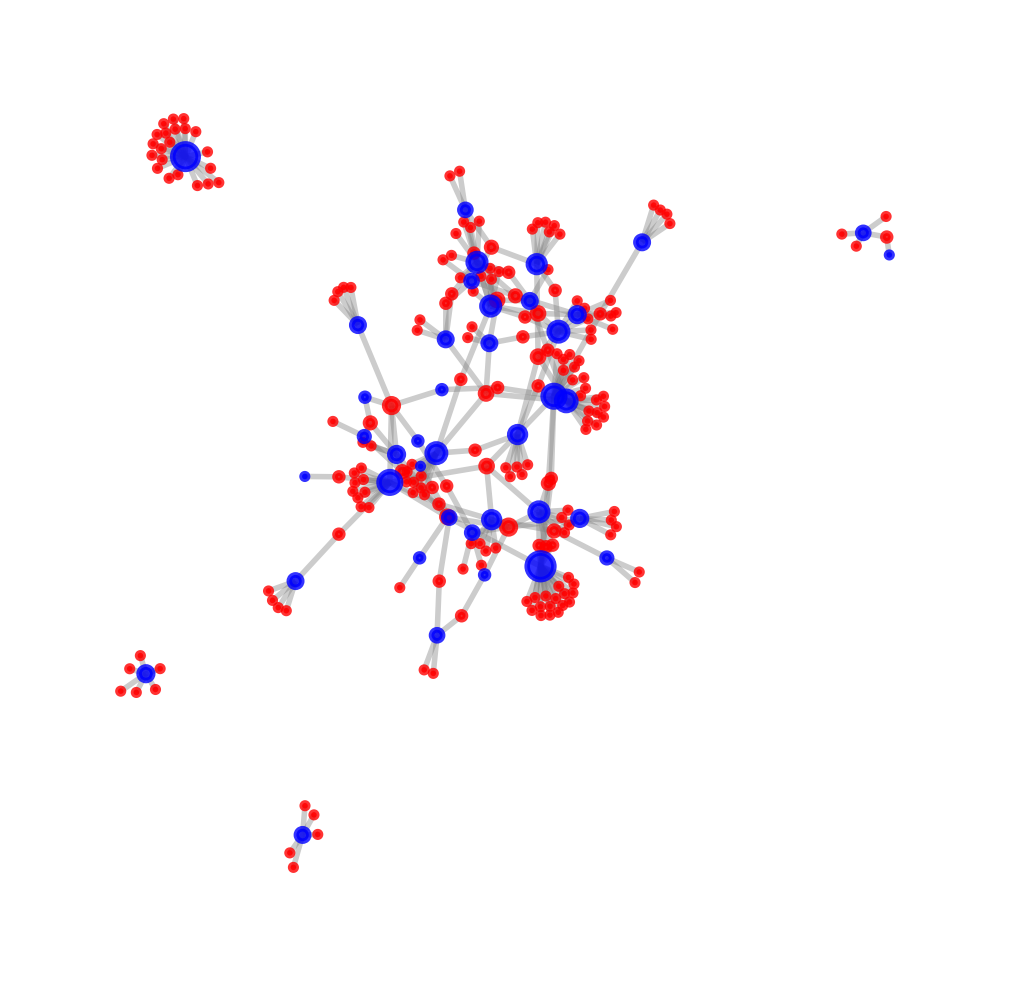

In [255]:
# Visualizing the network

fig = plt.figure(1, figsize=(3,3), dpi=400)
pos = nx.spring_layout(G)
colors = {0:'r', 1:'b'}
#nodes
nx.draw_networkx_nodes(G, pos=pos, node_size=[G.degree[node] for node in G], alpha = 0.8, \
                       node_color=[colors[G.nodes[node]['bipartite']]for node in G])
#edges
nx.draw_networkx_edges(G, pos=pos, alpha=0.4, edge_color='gray')
plt.axis('off')
plt.show()

#### Analysis


##### Teams interaction with players

In [217]:
# what are the degree of each node..degreeView
#G.degree()
# to get the degree of each node as a list
#degrees = [val for (node, val) in G.degree()]
#print(degrees)
#The node degree is the number of edges adjacent to the node. 
#The weighted node degree is the sum of the edge weights for edges incident to that node.
clubs_int, players_contract = bipartite.degrees(G, Players)
print(clubs_int)


[('St Neots Town', 1), ('Cruzeiro', 2), ('Blackpool', 2), ('Slovan Praha VII', 1), ('Cardiff City', 1), ('Leicester City', 2), ('Sinop', 1), ('Ashton United', 1), ('Fisher Athletic', 1), ('VfL Wolfsburg', 1), ('Tottenham Hotspur', 2), ('Sevilla', 1), ('Genoa', 1), ('Internacional de Lages', 1), ('Leyton Orient', 1), ('Grimsby Town', 1), ('FC N?\x81rnberg', 1), ('Delhi Dynamos', 1), ('Canberra City', 1), ('Fort Lauderdale Strikers', 1), ('ruda hvezda VII', 1), ('Aston Villa', 1), ('Athletic Bilbao', 1), ('Everton', 1), ('Grantham Town', 1), ('Fenerbahce', 1), ('Luton Town', 1), ('Bedford Town', 1), ('Botafogo', 1), ('Burnley', 2), ('Bristol Rovers', 1), ('Kyoto Purple Sanga', 2), ('New York City', 1), ('Flamengo', 2), ('Club Brugge', 1), ('King Lynn Town', 1), ('Talleres RE', 1), ('Perilima', 1), ('Barrow', 1), ('Portsmouth', 1), ('Linfield', 2), ('Juventus-SP', 1), ('Plymouth Argyle', 1), ('Gamba Osaka', 1), ('Crewe Alexandra', 1), ('Floreat Athena', 1), ('Sabah FA', 1), ('Lisburn Dist

##### Number of clubs each player had officially played

In [218]:
print(players_contract)

[('Peter Shilton', 8), ('Ray Clemence', 4), ('Joao Moutinho', 4), ('Timmy Simons', 5), ('Iker Casillas', 2), ('Fabio', 5), ('Andres Iniesta', 2), ('Frantisek Planicka', 6), ('Yasuhito Endo', 5), ('Roberto Carlos', 8), ('Dani Alves', 6), ('Alan Ball', 11), ('Lionel Messi', 2), ('Ian Callaghan', 6), ('Robbie James', 11), ('Raul', 4), ('Javier Zanetti', 3), ('Kazuyoshi Miura', 15), ('Glenn Ferguson', 4), ('Paolo Maldini', 1), ('Ronnie Rooke', 12), ('Cristiano Ronaldo', 4), ('Pat Jennings', 5), ('Andoni Zubizarreta', 5), ('Marcelinho Paraiba', 23), ('Rivaldo', 15), ('Rogerio Ceni', 2), ('Ryan Giggs', 1), ('David Seaman', 5), ('Xavi', 2), ('Ze Roberto', 10), ('Noel Bailie', 1), ('Tommy Hutchison', 10), ('Gianluigi Buffon', 3), ('Clarence Seedorf', 6), ('Graham Alexander', 4), ('David James', 10), ('Paul Bastock', 21), ('Frank Lampard', 5), ('Tony Ford', 9)]


##### Distribution of clubs interactions

In [219]:
# how to find the distribution for each club in the top50 2013
# how many time each degree appear
clubs_int_distribution = Counter(sorted(dict(clubs_int).values()))
players_contract_distribution = Counter(sorted(dict(players_contract).values()))
print(clubs_int_distribution)
#There are 161 clubs having at least one contract with a player
#there are 25 clubs having only 02 contracts with a player 
#There are 04 clubs having 06 contracts with players
#...
#there is 06 clubs having 03 contracts with players
#there are 02 clubs having 06 contracts with players

Counter({1: 161, 2: 25, 3: 6, 4: 6, 6: 2})


In [220]:
print(players_contract_distribution)
# There are 07 players from the list having only 05 contracts or had played for 05 clubs only
#There is one player who had 09 contracts or had played for 09 clubs...
#There is one player who had 12 contracts or had played for 12 clubs...
#There is one player who had 21 contracts or had played for 21 clubs...
#There is one player who had 23 contracts or had played for 23 clubs...

#There are 09 players who had only 01 contract or had played for 01 club up till 2013...>son of the club


Counter({5: 7, 4: 6, 2: 5, 6: 4, 1: 3, 10: 3, 3: 2, 8: 2, 11: 2, 15: 2, 9: 1, 12: 1, 21: 1, 23: 1})


##### Clubs, Players Distribution

In [221]:
# Let plot degree distribution , node1=node 1 distribution, node2 = node 2 distribution
def plot_degree_distr(node1, node2):
    
    #setup plot dimension
    fig = plt.figure(figsize = (11,5), dpi=600 )
    ax = [fig.add_subplot(1,2,i+1) for i in range(2)]
    
    #plot
    ax[0].plot(list(node1.keys()),list(node1.values()), 'bo', linestyle = '-', label='Clubs Interaction')
    ax[1].plot(list(node2.keys()),list(node2.values()), 'bo', linestyle = '-.', label = 'Players contracts')
    
    #setup axis
    for axis in ax:
        axis.set_ylabel('Frequency', fontsize=16)
        axis.tick_params(axis = 'both', which = 'major', labelsize = 16)
        axis.legend(loc='upper right', fontsize=12, ncol = 1, frameon = True)
    ax[0].set_xlabel('Degree-Clubs', fontsize = 16)
    ax[1].set_xlabel('Degree-Players', fontsize =16)
    
    plt.tight_layout()
    plt.show()
        


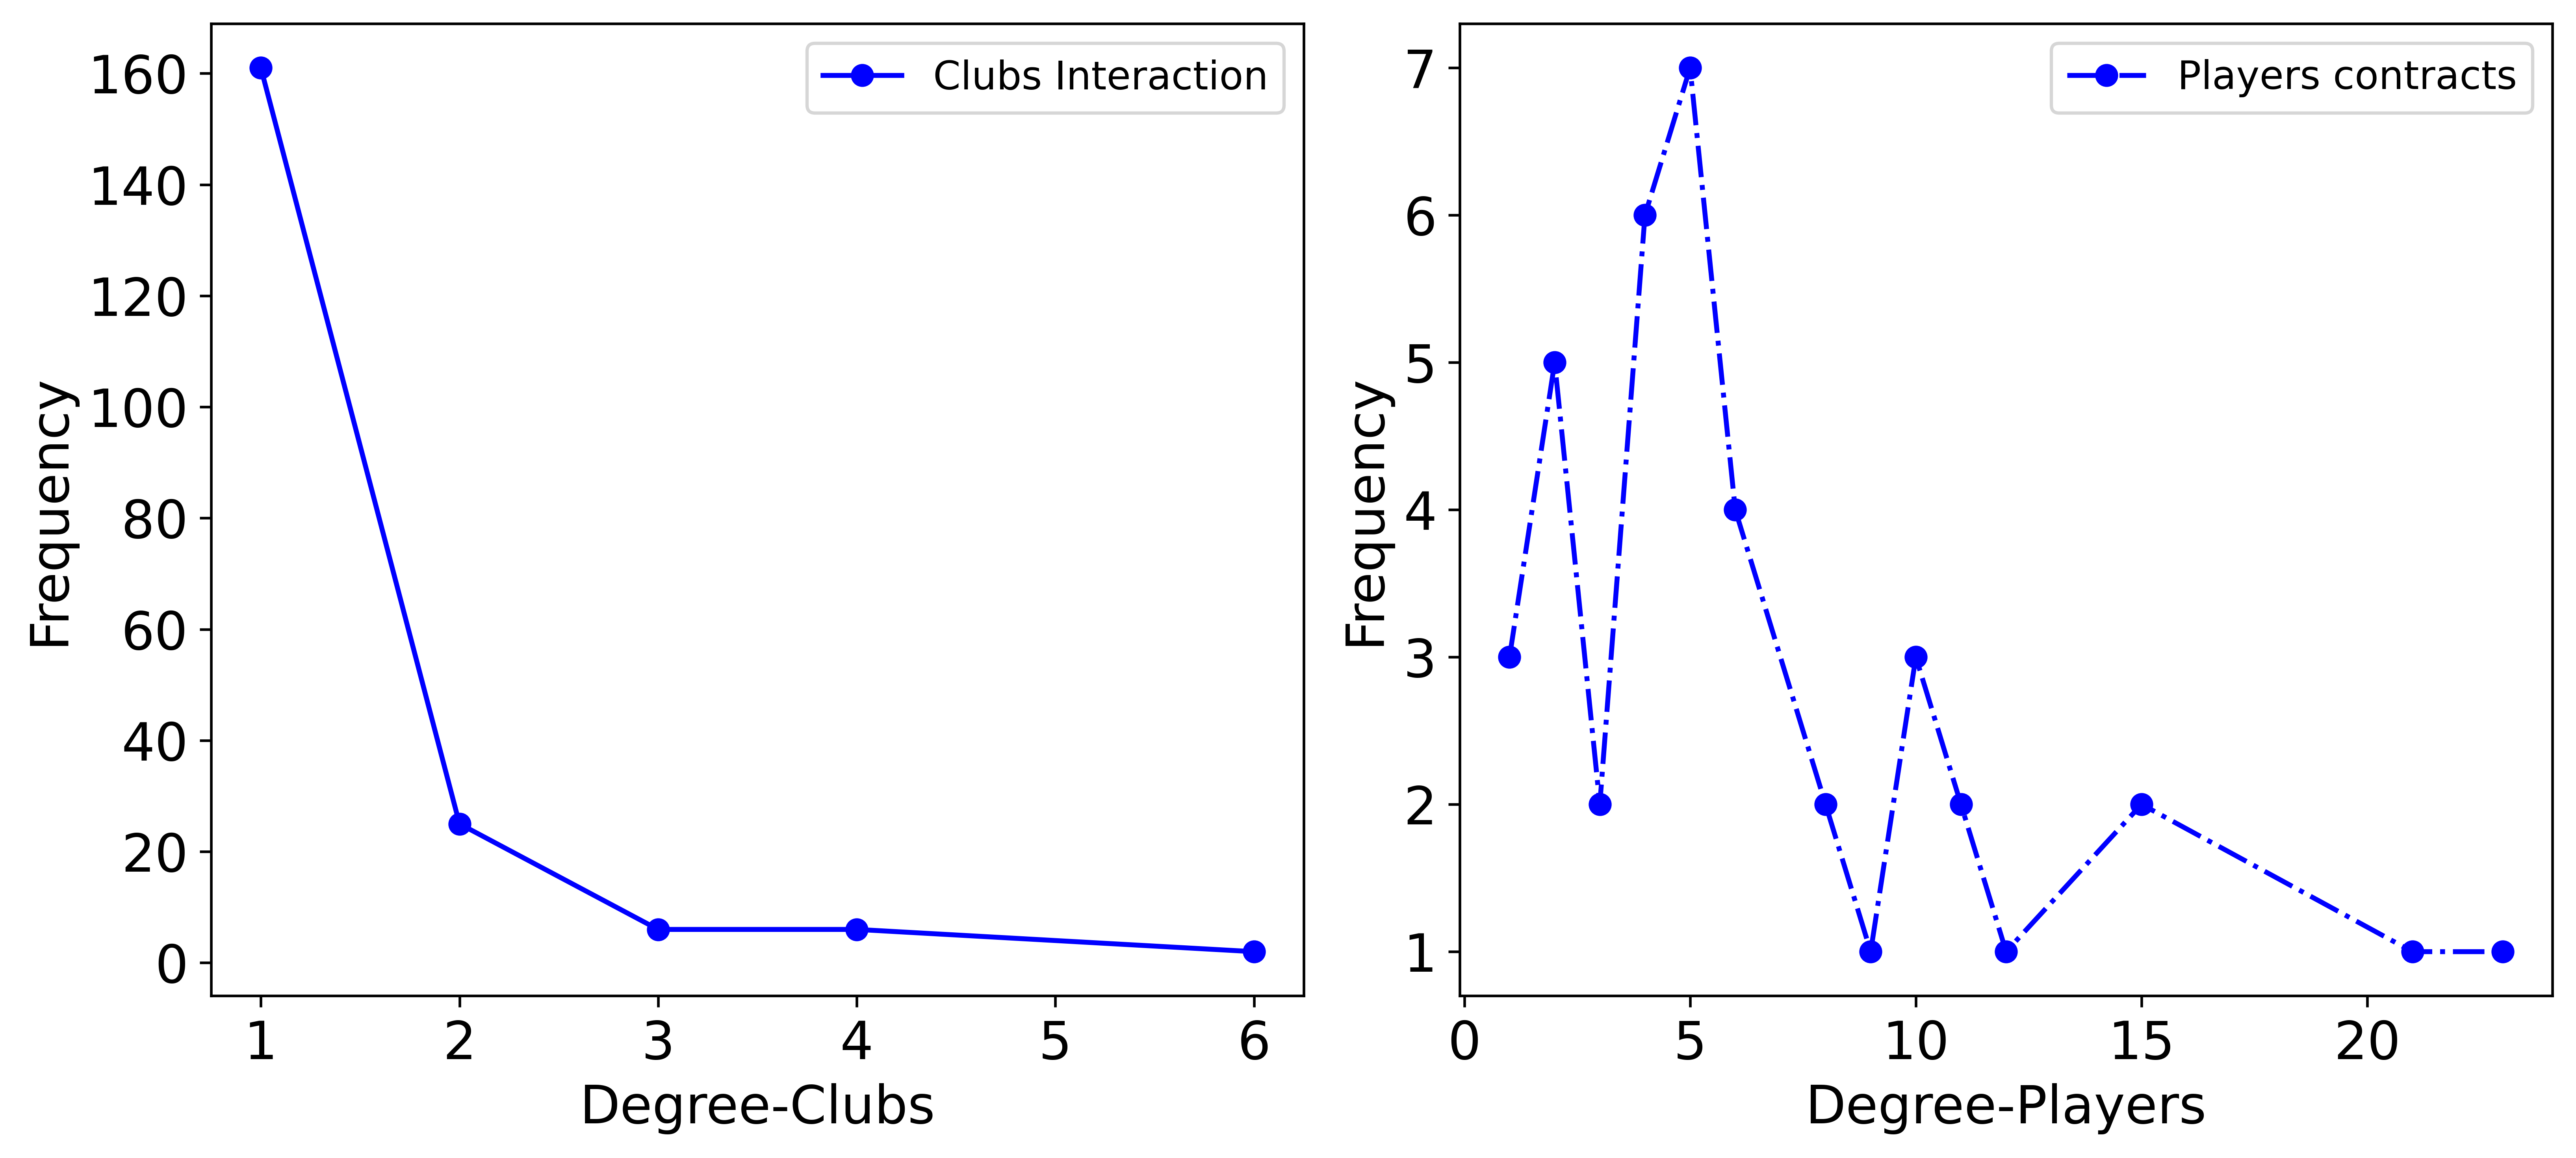

In [222]:
# let's call the distribution function
plot_degree_distr(clubs_int_distribution, players_contract_distribution)
# on the club interaction...frequency represent number of clubs for players on x-axis
# there are 161 clubs having only 01 player

# there are two players who played for more that 20 clubs

In [223]:
#projection
G1 = bipartite.projected_graph(G, Players)
Gm = bipartite.projected_graph(G, Players, 'MultiGraph')
Gw = bipartite.weighted_projected_graph(G, Players)

#Let's see the clubs interactions
int_distribution = Counter(sorted(dict(G1.degree()).values()))
strenght_distribution = Counter(sorted(dict(Gm.degree()).values()))

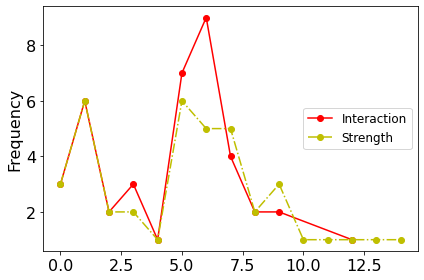

In [224]:
#Let's plot the projected degree distribution
def plot_projected_distr(pop_distribution, strenght_distribution):
    
    fig, ax = plt.subplots()
    ax.plot(list(pop_distribution.keys()),list(pop_distribution.values()), 'ro', linestyle = '-', label='Interaction')
    ax.plot(list(strenght_distribution.keys()),list(strenght_distribution.values()), 'yo', linestyle = '-.', label = 'Strength')
    ax.set_ylabel('Frequency', fontsize=16)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    ax.legend(loc='center right', fontsize=12, ncol = 1, frameon = True)
    plt.tight_layout()
    plt.show()
        
plot_projected_distr(int_distribution, strenght_distribution)
# about even ...players

##### Let's see some numbers


In [225]:
def get_highest(degree_dict, degree_type):
    #order dict by value
    p = Counter(dict(degree_dict))
    print('Top10 '  +  degree_type)
    for u, v in p.most_common(10):
        print('%s: %i' % (u,v))
                
get_highest(clubs_int, ' Clubs with highest interactions')

Top10  Clubs with highest interactions
Real Madrid: 6
Barcelona: 6
Sao Paulo: 4
Manchester City: 4
Swansea City: 4
Palmeiras: 4
Arsenal: 4
Stoke City: 4
Liverpool: 3
Juventus: 3


In [226]:
get_highest(players_contract, "players with Number of clubs they played with")

Top10 players with Number of clubs they played with
Marcelinho Paraiba: 23
Paul Bastock: 21
Kazuyoshi Miura: 15
Rivaldo: 15
Ronnie Rooke: 12
Alan Ball: 11
Robbie James: 11
Ze Roberto: 10
Tommy Hutchison: 10
David James: 10


In [227]:
get_highest(G.degree(), 'Interactions')

Top10 Interactions
Marcelinho Paraiba: 23
Paul Bastock: 21
Kazuyoshi Miura: 15
Rivaldo: 15
Ronnie Rooke: 12
Alan Ball: 11
Robbie James: 11
David James: 10
Tommy Hutchison: 10
Ze Roberto: 10


In [228]:
get_highest(Gm.degree(), "Strength")
# wonder if because of the projection

Top10 Strength
Rivaldo: 14
Ze Roberto: 13
Dani Alves: 12
Roberto Carlos: 11
Robbie James: 10
Cristiano Ronaldo: 9
Marcelinho Paraiba: 9
Tommy Hutchison: 9
Frank Lampard: 8
Kazuyoshi Miura: 8


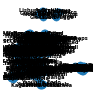

In [232]:
#G = nx.complete_graph()
#fig = plt.figure(1, figsize=(3,3), dpi=30)
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

###### Centrality

In [238]:
#Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. 
#The betweenness centrality is a relative measure of closeness centrality in terms of prioritising shortest paths.
#https://www.codingninjas.com/codestudio/library/centrality-measure-in-graph-theory#:~:text=%20Graph%20Theory%3A%20Centrality%20Measures%20%201%20Degree,relative%20measure%20of%20closeness%20centrality%20in...%20More%20
betweenness = nx.betweenness_centrality(Gw, normalized=True)
betweenness = Counter(nx.betweenness_centrality(Gw, normalized = True, weight='weight'))
print('Top10 betweenness centrality')
for u, v in betweenness.most_common(10):
    print('%s: %i' % (u,v))

Top10 betweenness centrality
Rivaldo: 0
Cristiano Ronaldo: 0
Kazuyoshi Miura: 0
Roberto Carlos: 0
Dani Alves: 0
Ze Roberto: 0
Raul: 0
Xavi: 0
Ronnie Rooke: 0
Lionel Messi: 0


In [ ]:
How to intepret this betweenness centrality

###### Closeness Centrality
This is based on the assumption that important nodes are close to other nodes. It is calculated as the sum of the path lengths from the given node to all other nodes.

In [243]:
close_centrality = nx.closeness_centrality(Gw)
close_centrality = Counter(nx.closeness_centrality(Gw))
print('Top10 closeness centrality')
for u, v in close_centrality.most_common(10):
    print('%s: %i' % (u,v))

Top10 closeness centrality
Rivaldo: 0
Roberto Carlos: 0
Ze Roberto: 0
Dani Alves: 0
Cristiano Ronaldo: 0
Kazuyoshi Miura: 0
Marcelinho Paraiba: 0
Raul: 0
Xavi: 0
Andres Iniesta: 0


In [ ]:
Closeness and betweeness come out 0

##### one node projection


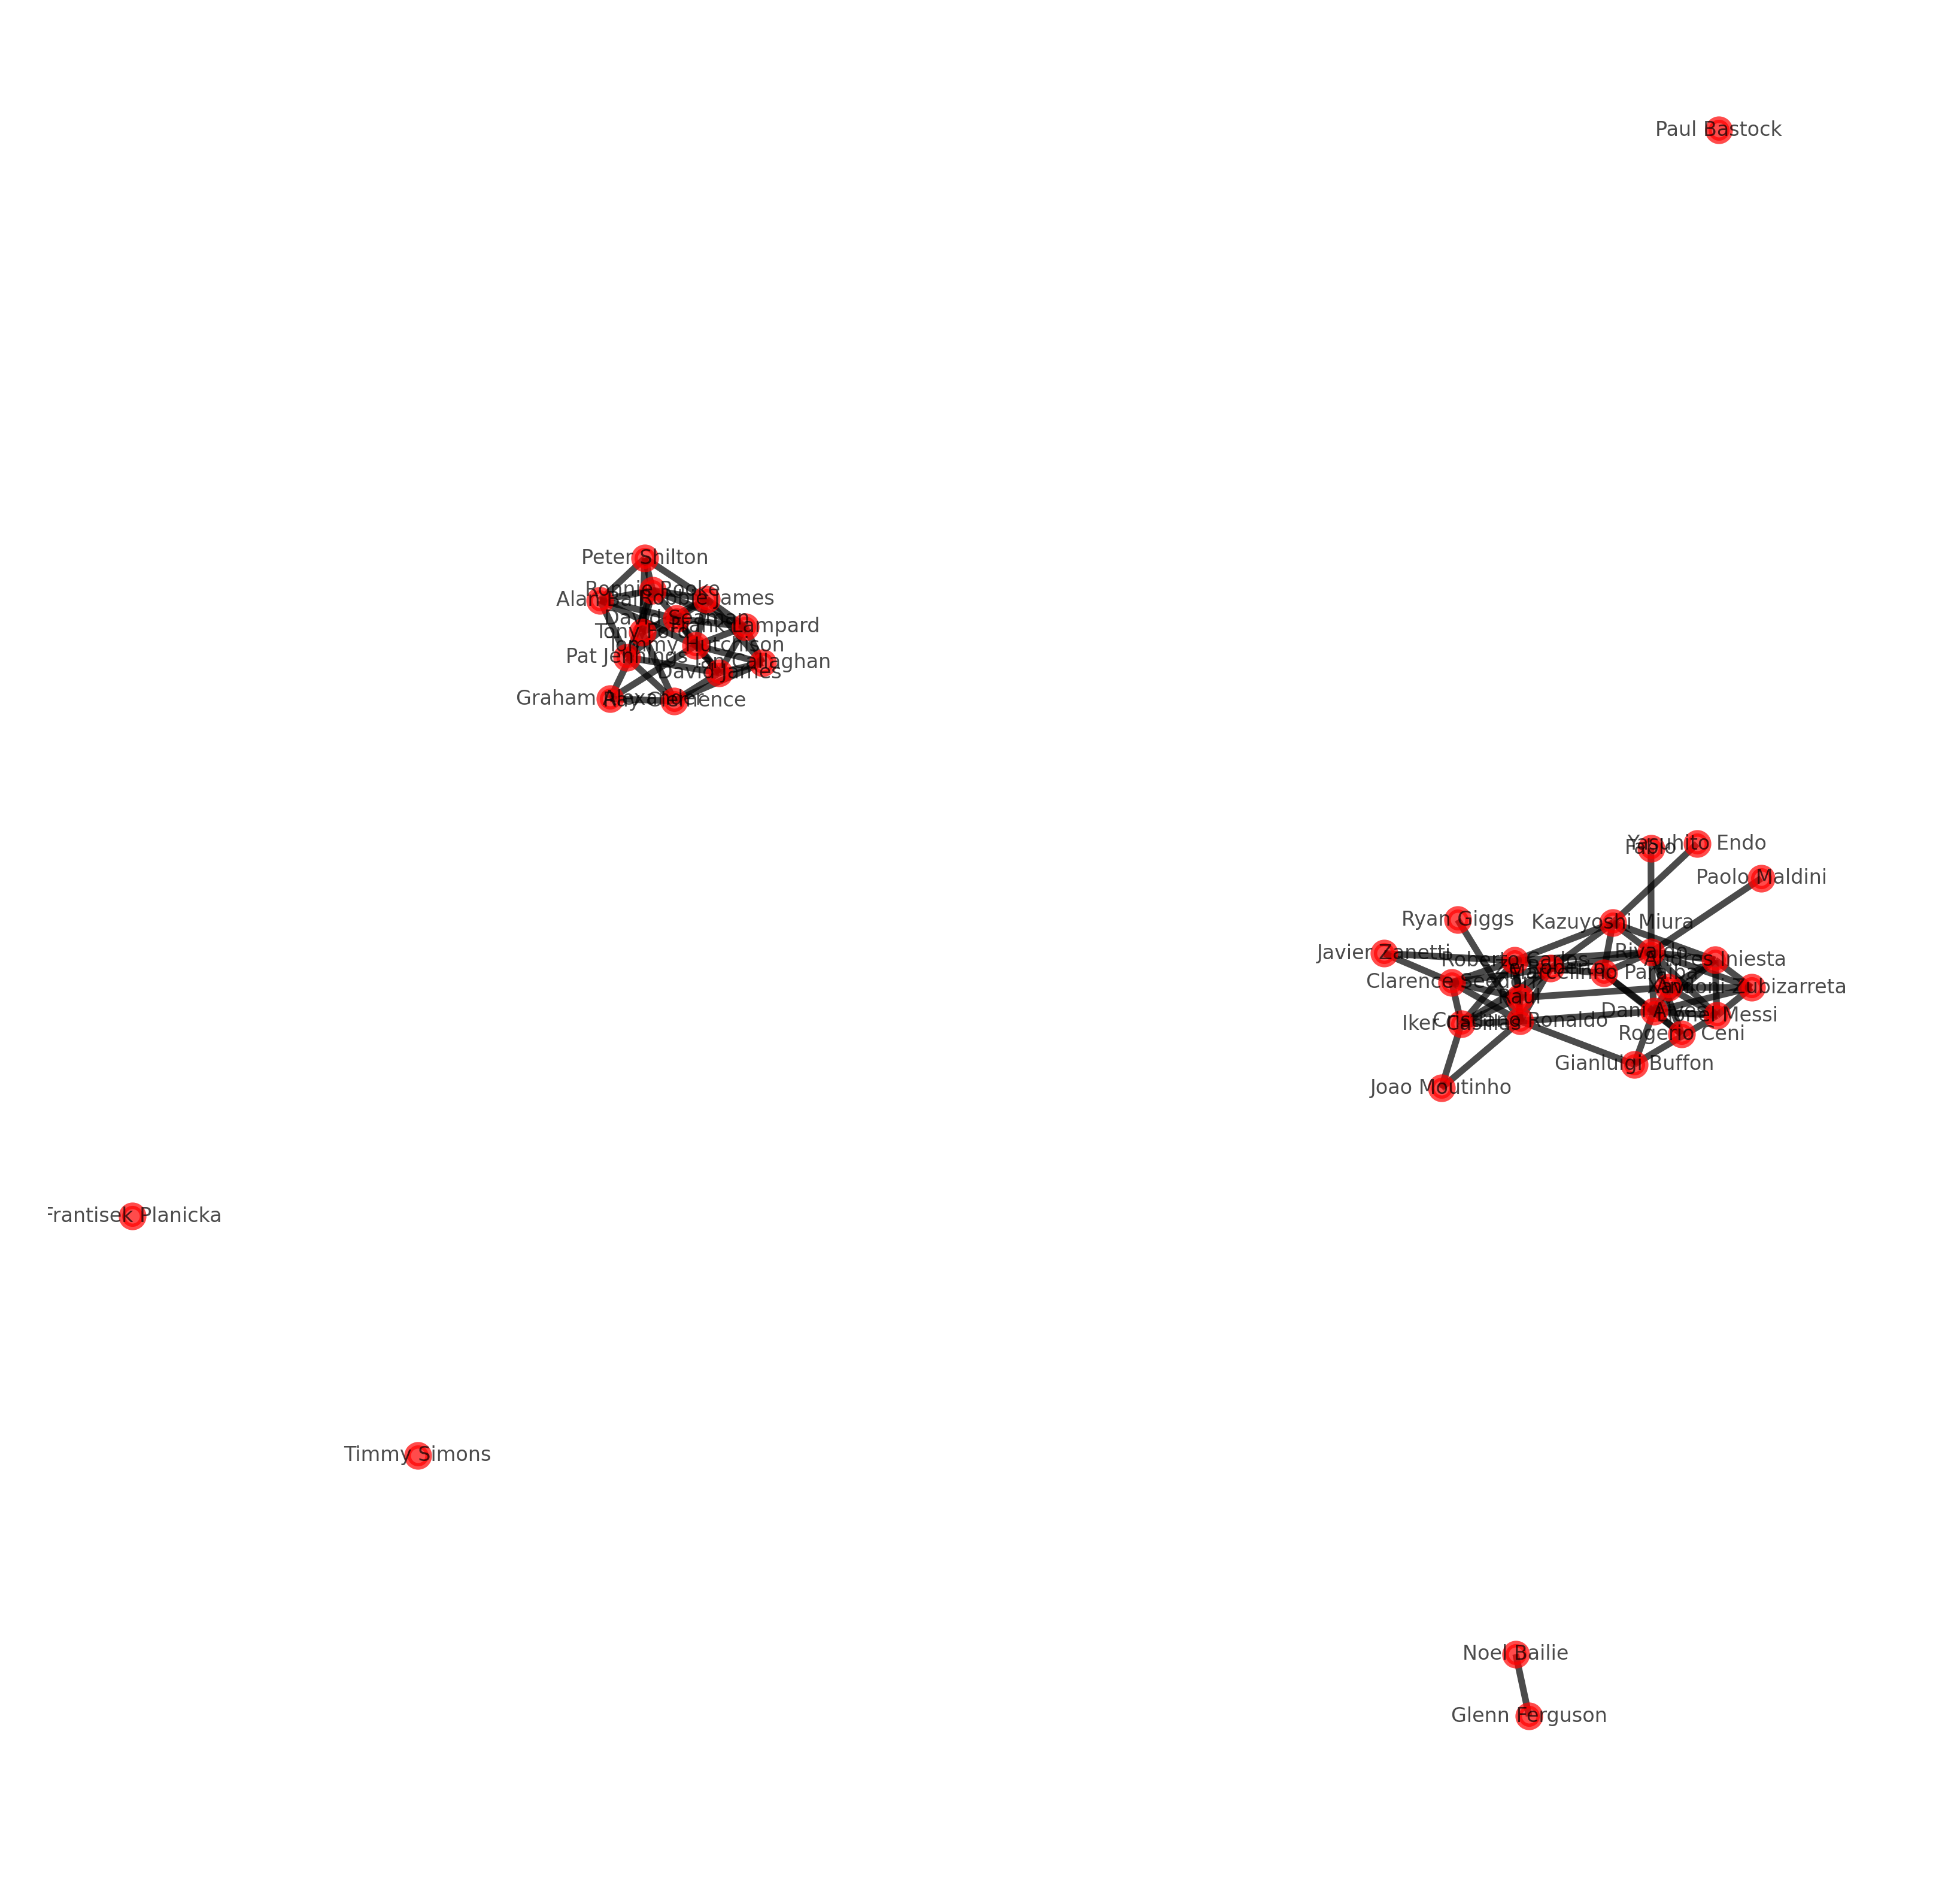

In [308]:
remove = [Teams for Teams in Teams if G.degree(Teams)==0]
G.remove_nodes_from(remove)
fig = plt.figure(1, figsize=(5,5), dpi=800)


#Network layout, position
pos = nx.spring_layout(Gw)

#node layout
nx.draw_networkx(Gw, pos = pos, with_labels=True, font_size=3, font_weight=1, node_size = 10 , node_color = 'r', alpha = 0.7, edge_color = 'black')

plt.axis('off')
plt.show()


In [325]:
'''
import community

#dict node as key, community number as value
comm_dict = community.best_partition(Gw)
print(comm_dict)

# set of community , community member
comm_set = set(list(comm_dict.value()))
print(comm_set)

comm_org = {comm:[] for comm in list(comm_set)}
for node, comm in comm_dict.items():
    comm_org[comm].append(node)
print(comm_org)

'''

AttributeError: module 'community' has no attribute 'best_partition'

In [324]:


fig = plt.figure(1, figsize=(8,8), dpi=400)
#fig = plt.figure(1, figsize=(3,3), dpi=3000)

#Network layout, position
pos = nx.spring_layout(Gw, iteration = 50, weight = 'weight', scale = 1.0, k = 0.4, seed = 212)
colors = {0:'#07051b', 1:'#150b37', 2:'#280b53', 3:'#984ea3', 4:'#ff7f00', 5:'#3d0965', 6:'#510e6c', 7:'ffff33', 8:'a65628'}

#label for highest betweenness centrality
labels = {u:u for u, lab in pos.items() if u in pos if betweenness[u]>0.5}

#node layout
nx.draw_networkx_nodes(Gw, pos = pos, node_size = [max(Gw.degree(u)**1.2,5) for u in Gw], alpha = 0.8, edge_color = 'gray', \
                      node_color = [colors[c] for u, c in comm_dict.items()])

weights = [(Gw[u][v]['weight']/8) for u, v in Gw.edges()]
nx.draw_networkx_edges(Gw, pos = pos, width = weights, alpha = 0.6, edge_color = 'k')
nx.draw_networkx_labels(Gw, pos = pos, labels = labels, font_size = 4)

plt.axis('off')
plt.savefig('top_players_appearance.png', format = 'png', dpi = 400)
#plt.savefig('top_players_appearance.pdf', format = 'pdf', dpi = 400)
plt.show()



NameError: name 'comm_dict' is not defined

<Figure size 3200x3200 with 0 Axes>